In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [100]:
employee_satisfaction_data = pd.read_csv('data.csv')

In [101]:
employee_satisfaction_data.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [102]:
employee_satisfaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 54.8+ KB


In [103]:
employee_satisfaction_data.isnull().sum()

Unnamed: 0          0
emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

In [104]:
employee_satisfaction_data = employee_satisfaction_data.drop(['emp_id', 'location', 'education', 'recruitment_type', 'onsite', 'job_level', 'rating', 'awards', 'certifications', 'Unnamed: 0', 'Dept'], axis = 1)

In [105]:
x = employee_satisfaction_data.drop(['satisfied'], axis = 1)

In [106]:
y = employee_satisfaction_data['satisfied']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [110]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [111]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [112]:
knn = KNeighborsClassifier(n_neighbors=5)

In [113]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [114]:
pred = knn.predict(scaled_X_test)

In [115]:
print(confusion_matrix(y_test,pred))

[[25 17]
 [27 31]]


In [116]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.60      0.53        42
           1       0.65      0.53      0.58        58

    accuracy                           0.56       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.58      0.56      0.56       100



In [117]:
print(accuracy_score(y_test,pred))

0.56


In [118]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

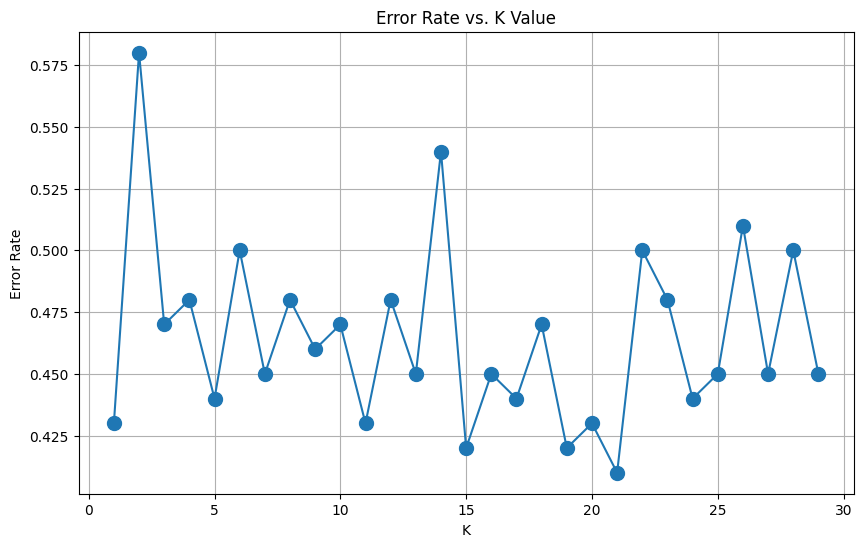

In [119]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [120]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[28 14]
 [33 25]]

              precision    recall  f1-score   support

           0       0.46      0.67      0.54        42
           1       0.64      0.43      0.52        58

    accuracy                           0.53       100
   macro avg       0.55      0.55      0.53       100
weighted avg       0.56      0.53      0.53       100

